In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\jonas\OneDrive\Github\EBA-3500\site':
  os.chdir(r'C:\Users\jonas\OneDrive\Github\EBA-3500\site')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\jonas\AppData\Local\Temp\ipykernel_15048\3518293376.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\_collectio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import pprint

In [4]:
boston = pd.read_csv("Boston.csv", na_values="?")
boston.drop(boston.columns[0], axis = 1, inplace = True)

In [5]:
boston.info()
boston.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
covariates = set(boston.columns.values.tolist()) - set(["crim"])
fits = {cov: smf.ols("crim ~ " + cov, data = boston).fit() for cov in covariates}

In [7]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint([(key, value.rsquared.round(2), value.pvalues[1].round(3)) for key, value in fits.items()])

[   ('chas', 0.0, 0.209),
    ('dis', 0.14, 0.0),
    ('medv', 0.15, 0.0),
    ('indus', 0.17, 0.0),
    ('tax', 0.34, 0.0),
    ('nox', 0.18, 0.0),
    ('age', 0.12, 0.0),
    ('ptratio', 0.08, 0.0),
    ('rm', 0.05, 0.0),
    ('lstat', 0.21, 0.0),
    ('zn', 0.04, 0.0),
    ('rad', 0.39, 0.0)]


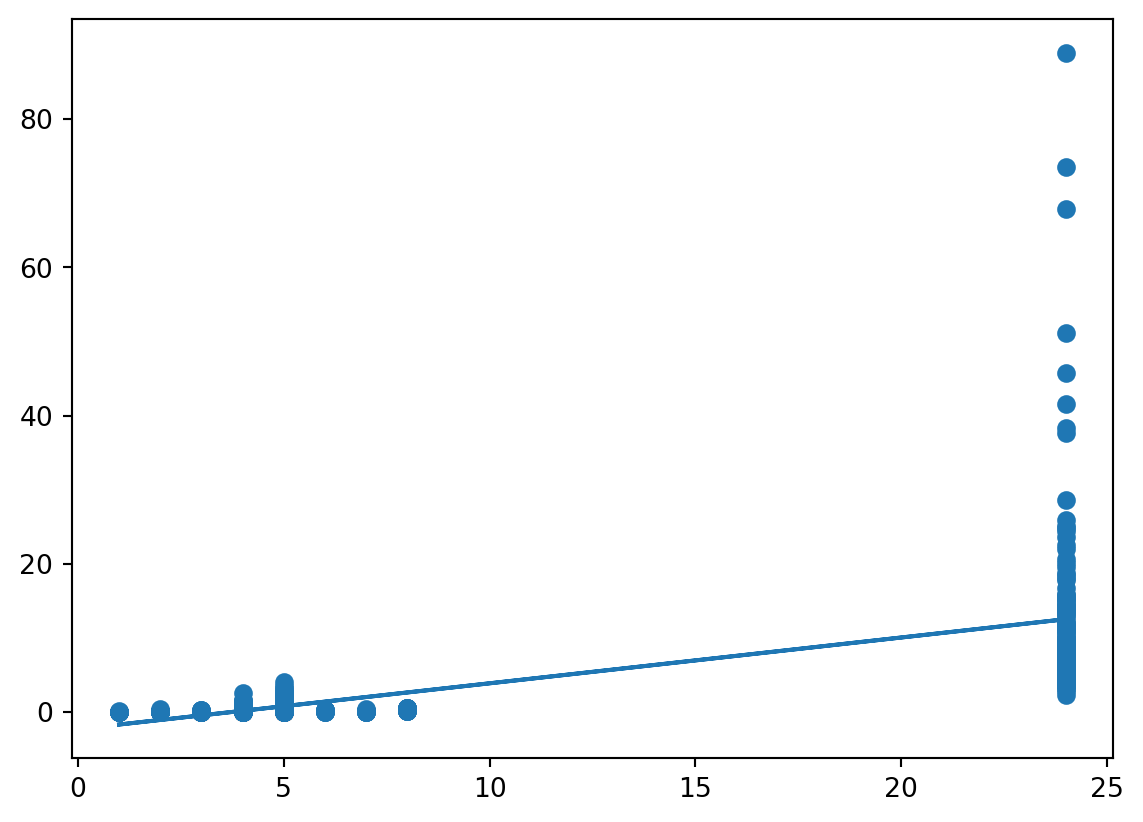

In [8]:
plt.clf()
plt.scatter(boston.rad, boston.crim)
plt.plot(boston.rad, fits["rad"].params[0] + fits["rad"].params[1] * boston.rad)
plt.show()

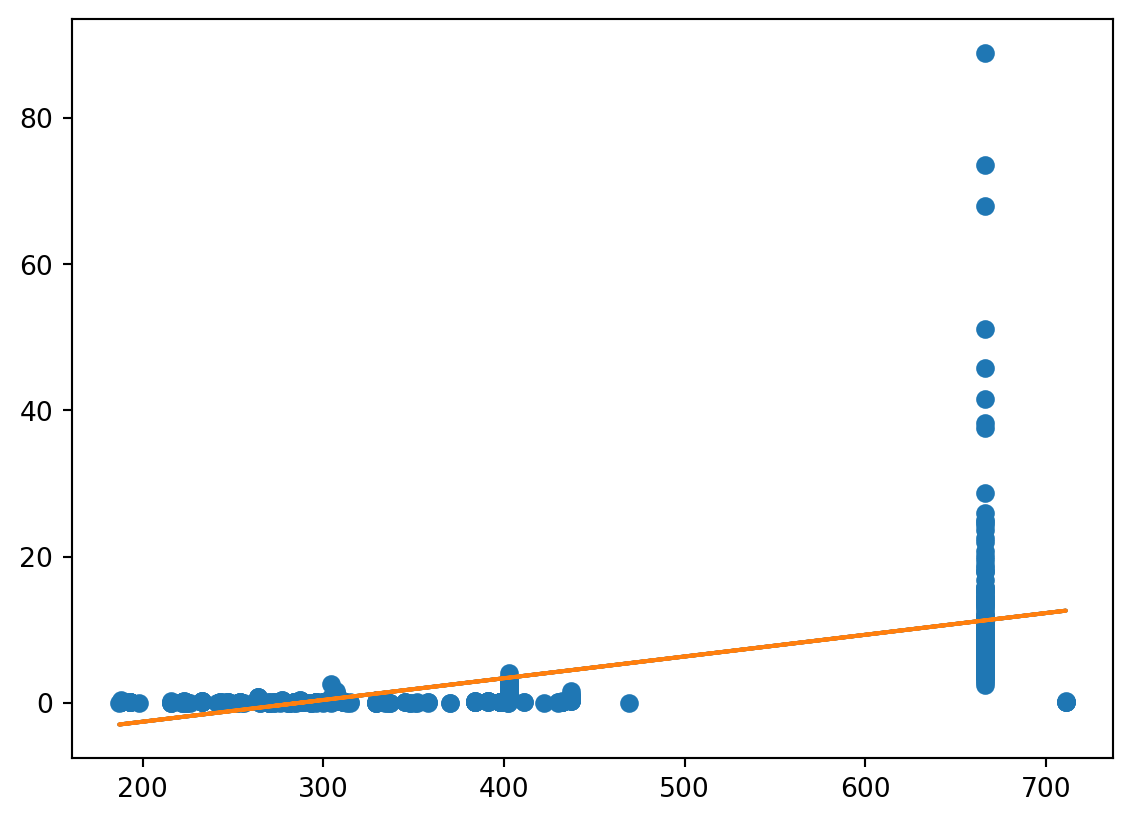

In [9]:
plt.clf()
plt.scatter(boston.tax, boston.crim)
plt.plot(boston.tax, fits["tax"].params[0] + fits["tax"].params[1] * boston.tax)
plt.plot(boston.tax, fits["tax"].predict())
plt.show()

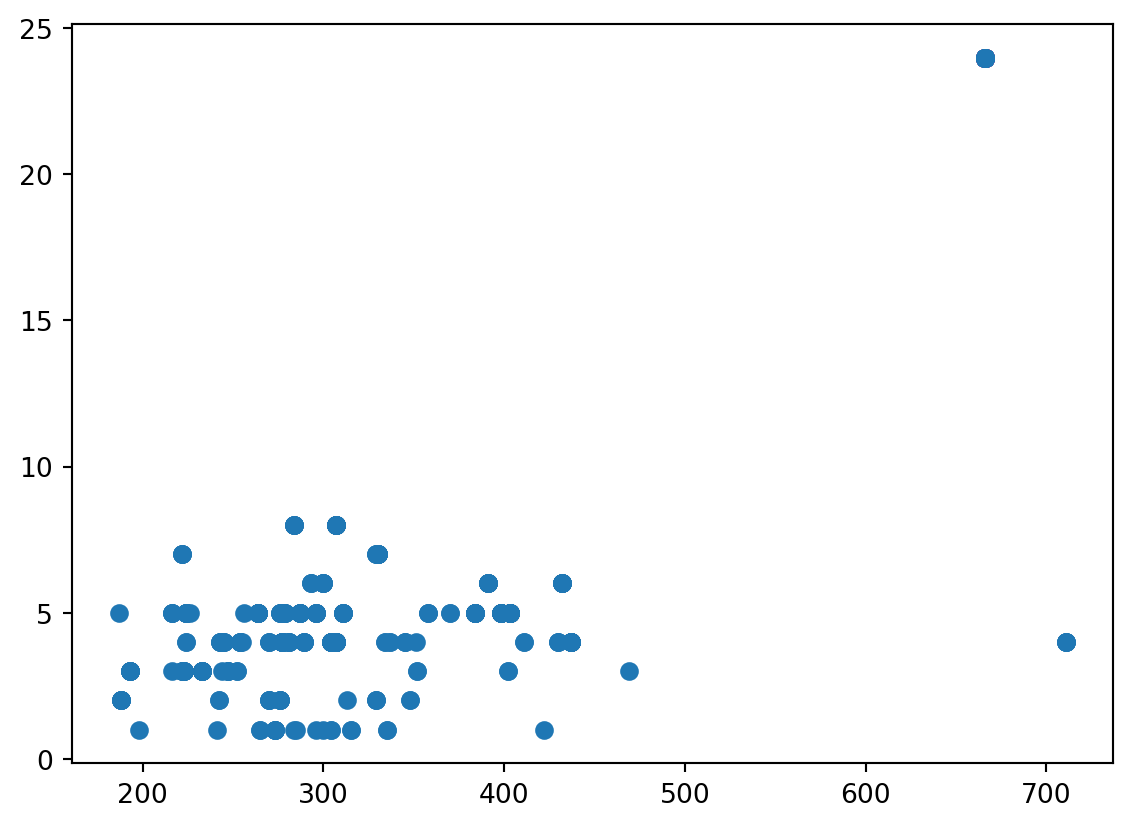

array([[1.        , 0.91022819],
       [0.91022819, 1.        ]])

In [10]:
plt.clf()
plt.scatter(boston.tax, boston.rad)
plt.show()
np.corrcoef(boston.tax, boston.rad)

In [11]:
from collections import Counter
pp.pprint(Counter(zip(boston.rad, boston.tax)))

Counter({   (24, 666): 132,
            (5, 403): 30,
            (4, 307): 22,
            (8, 307): 18,
            (4, 437): 15,
            (5, 398): 12,
            (5, 264): 12,
            (4, 304): 12,
            (5, 384): 11,
            (4, 277): 11,
            (7, 330): 10,
            (3, 233): 9,
            (6, 432): 9,
            (3, 193): 8,
            (5, 287): 8,
            (5, 224): 8,
            (6, 391): 8,
            (5, 311): 7,
            (2, 188): 7,
            (5, 296): 7,
            (8, 284): 6,
            (6, 300): 6,
            (2, 276): 5,
            (3, 223): 5,
            (4, 254): 5,
            (4, 289): 5,
            (4, 711): 5,
            (1, 273): 5,
            (5, 279): 4,
            (4, 243): 4,
            (4, 305): 4,
            (4, 281): 4,
            (3, 247): 4,
            (2, 270): 4,
            (5, 276): 4,
            (5, 216): 4,
            (7, 222): 4,
            (3, 222): 3,
            (4, 345): 3,
            

In [12]:
formula = "crim" + "~" + "+".join(boston.columns.difference(["crim"]))
fit = smf.ols(formula, boston).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           2.03e-56
Time:                        13:58:54   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
rad            0.6125      0.088      6.997      0.000       0.440       0.784
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
zn             0.0457      0.019      2.433      0.015       0.009       0.083
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
uni_ = sorted([(cov, fit.params[1]) for cov, fit in fits.items()])
pp.pprint(uni_)

[   ('age', 0.1077862271395331),
    ('chas', -1.892776550803758),
    ('dis', -1.5509016824100994),
    ('indus', 0.5097763311042306),
    ('lstat', 0.5488047820623981),
    ('medv', -0.363159922257603),
    ('nox', 31.248531201122923),
    ('ptratio', 1.1519827870705872),
    ('rad', 0.6179109273272014),
    ('rm', -2.684051224113948),
    ('tax', 0.02974225282276537),
    ('zn', -0.07393497740412368)]


In [14]:
uni = [x for i,x in uni_]

In [15]:
multi = fit.params[1:]

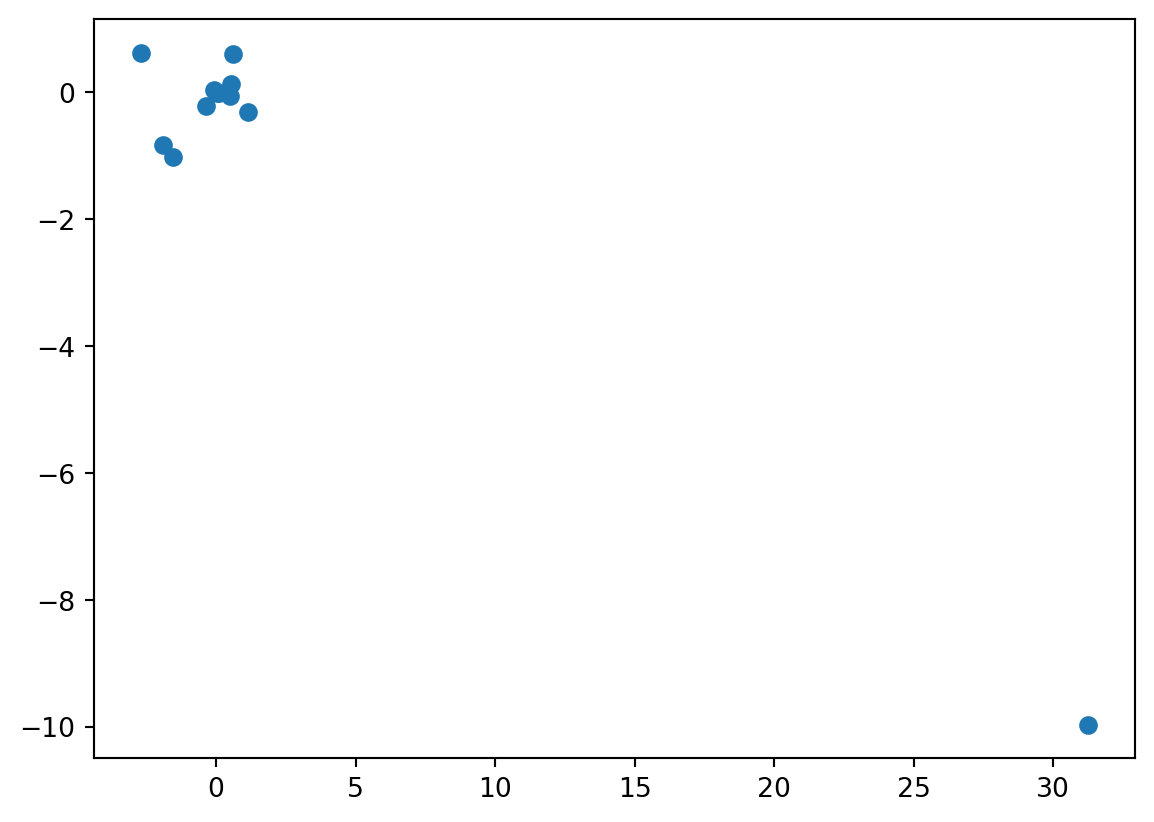

In [16]:
plt.clf()
plt.scatter(uni, multi)
plt.show()

In [17]:
pp.pprint({cov: (x, y) for (cov, x), y in zip(uni_, multi)})

{   'age': (0.1077862271395331, -0.0008482790661906402),
    'chas': (-1.892776550803758, -0.8253775522410146),
    'dis': (-1.5509016824100994, -1.0122467382083935),
    'indus': (0.5097763311042306, -0.058350110665981544),
    'lstat': (0.5488047820623981, 0.1388005967767626),
    'medv': (-0.363159922257603, -0.22005635903920306),
    'nox': (31.248531201122923, -9.957586547089225),
    'ptratio': (1.1519827870705872, -0.3040727572312342),
    'rad': (0.6179109273272014, 0.6124653114967983),
    'rm': (-2.684051224113948, 0.6289106621781995),
    'tax': (0.02974225282276537, -0.0037756465234424076),
    'zn': (-0.07393497740412368, 0.04571003863975589)}


In [18]:
formula = lambda x: f"crim ~ {x} + I({x}**2) + I({x}**3)"
fits_cubic = {cov: smf.ols(formula(cov), boston).fit() for cov in covariates}

In [19]:
pp.pprint([(cov, fit.pvalues[2].round(3), fit.pvalues[3].round(3)) for cov, fit in fits_cubic.items()])

[   ('chas', 0.681, 0.681),
    ('dis', 0.0, 0.0),
    ('medv', 0.0, 0.0),
    ('indus', 0.0, 0.0),
    ('tax', 0.137, 0.244),
    ('nox', 0.0, 0.0),
    ('age', 0.047, 0.007),
    ('ptratio', 0.004, 0.006),
    ('rm', 0.364, 0.509),
    ('lstat', 0.065, 0.13),
    ('zn', 0.094, 0.23),
    ('rad', 0.613, 0.482)]


In [20]:
pp.pprint({cov: (fit.rsquared_adj - fit_c.rsquared_adj).round(3) for (cov, fit), fit_c in zip(fits.items(), fits_cubic.values())})

{   'age': -0.047,
    'chas': 0.002,
    'dis': -0.131,
    'indus': -0.092,
    'lstat': -0.007,
    'medv': -0.268,
    'nox': -0.117,
    'ptratio': -0.026,
    'rad': -0.006,
    'rm': -0.016,
    'tax': -0.027,
    'zn': -0.014}
